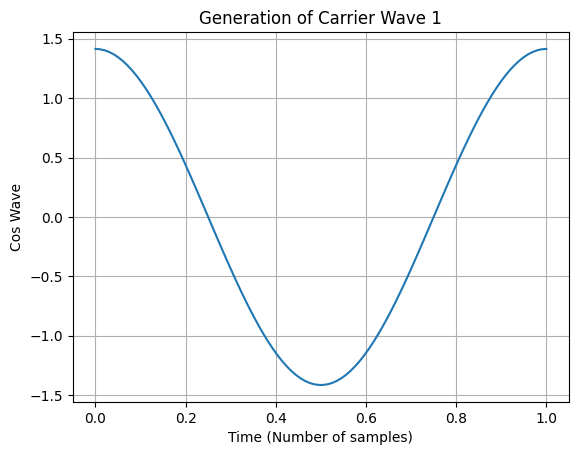

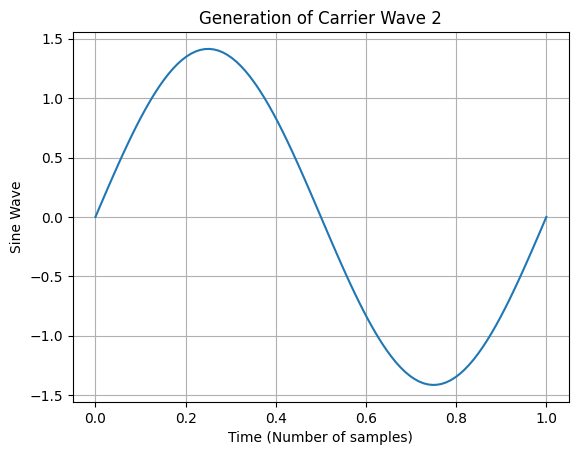

0.01192783849109691
0.21045082284519379
0.31289073070577234
0.6402947748687223
0.8958555913798685
0.13119788031316204
0.7560340249987052
0.12232641511990028
0.9087169575210824
0.8365426619527081
0.9410180904319814
0.10758506369161369
0.3067730682237454
0.8711021577347257
0.06035503267868236
0.7815677343327683


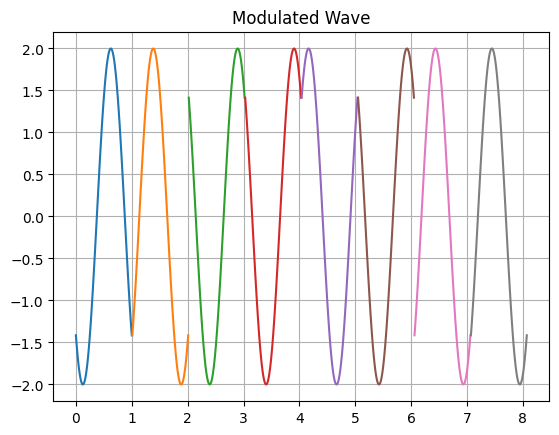

C:\Users\Monjurul Alam\AppData\Local\Temp\ipykernel_9408\2671765887.py:76: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax3.stem(range(16), m,use_line_collection=True)


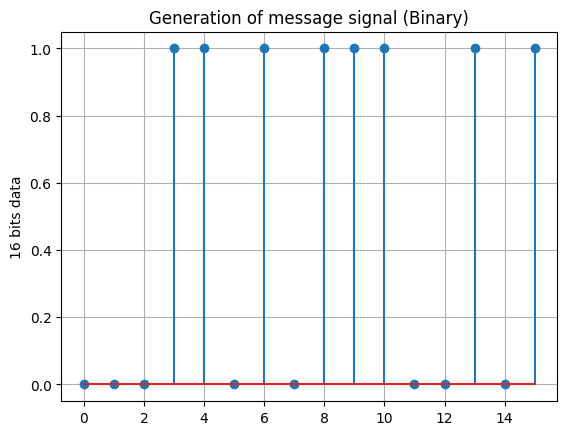

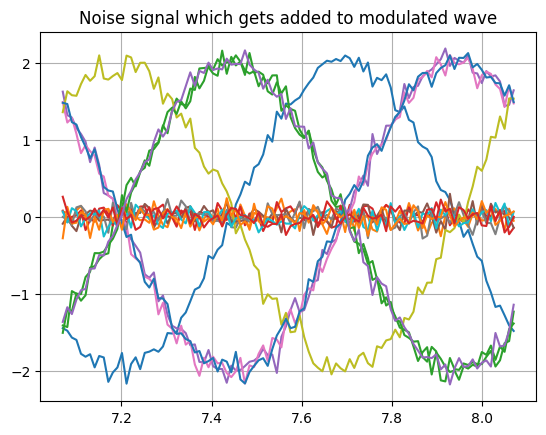

C:\Users\Monjurul Alam\AppData\Local\Temp\ipykernel_9408\2671765887.py:131: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax6.stem(range(16), demod,use_line_collection=True)


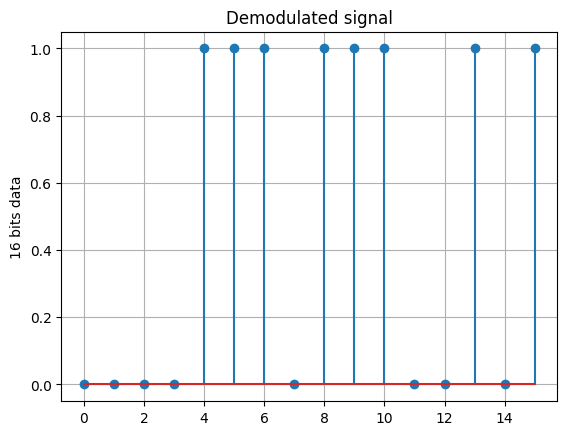

In [2]:

import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import random

t = np.linspace(0,1,100)  # Time
tb = 1;
fc = 1;    # carrier frequency

c1 = sqrt(2/tb)*np.cos(2*np.pi*fc*t)  # carrier frequency cosine wave
c2 = sqrt(2/tb)*np.sin(2*np.pi*fc*t)  # carrier frequency sine wave

fig, ax1 = plt.subplots()

ax1.plot(t, c1)
ax1.grid()
ax1.set_xlabel('Time (Number of samples)')
ax1.set_ylabel('Cos Wave')
plt.title('Generation of Carrier Wave 1')
plt.show()

fig, ax2 = plt.subplots()
ax2.plot(t, c2)
ax2.grid()
ax2.set_xlabel('Time (Number of samples)')
ax2.set_ylabel('Sine Wave')
plt.title('Generation of Carrier Wave 2')
plt.show()


m = []
t1 = 0;
t2 = tb;
for i in range(16):
    m.append(random.uniform(0,1))   # message signal (binary)
    print(m[i])


## modulation

odd_sig = np.zeros((16,100))
even_sig = np.zeros((16,100))
fig, ax4 = plt.subplots()
for i in range(0,15,2):
    t = np.linspace(t1,t2,100)
    if (m[i]>0.5):
        m[i] = 1
        m_s = np.ones((1,len(t)))
    else:
        m[i] = 0
        m_s = (-1)*np.ones((1,len(t)))

    odd_sig[i,:] = c1*m_s

    if (m[i+1]>0.5):
        m[i+1] = 1
        m_s = np.ones((1,len(t)))
    else:
        m[i+1] = 0
        m_s = (-1)*np.ones((1,len(t)))

    even_sig[i,:] = c2*m_s

    qpsk = odd_sig + even_sig   # modulated wave = oddbits + evenbits

    ax4.plot(t,qpsk[i,:])
    t1 = t1 + (tb+0.01)
    t2 = t2 + (tb+0.01)

ax4.grid()
plt.title('Modulated Wave')
plt.show()


fig, ax3 = plt.subplots()
ax3.stem(range(16), m,use_line_collection=True)
ax3.grid()
ax3.set_ylabel('16 bits data')
plt.title('Generation of message signal (Binary)')
plt.show()

## noise


noise = np.random.normal(0, 0.1, [16,100]) # noise using random function

channel = noise + qpsk    # adding noise to qpsk modulated wave

fig, ax5 = plt.subplots()
for i in range(0,15,1):
       ax5.plot(t,channel[i,:])

ax5.grid()
plt.title('Noise signal which gets added to modulated wave')
plt.show()




## demodulation


t1 = 0
t2 = tb

demod = np.zeros((16,1))    # demodulated signal  (demodulation of noise + qpsk modulated wave)

for i in range(0,15,1):
    t = np.linspace(t1,t2,100)
    x1 = sum(c1*channel[i,:])
    x2 = sum(c2*channel[i,:])

    if(x1>0 and x2>0):
        demod[i] = 1
        demod[i+1] = 1
    elif (x1>0 and x2<0):
        demod[i] = 1
        demod[i+1] = 0
    elif (x1<0 and x2<0):
        demod[i] = 0
        demod[i+1] = 0
    elif (x1<0 and x2>0):
        demod[i] = 0
        demod[i+1] = 1

    t1 = t1 + (tb+0.01)
    t2 = t2 + (tb+0.01)


fig, ax6 = plt.subplots()
ax6.stem(range(16), demod,use_line_collection=True)
ax6.grid()
ax6.set_ylabel('16 bits data')
plt.title('Demodulated signal')
plt.show()